In [94]:
import numpy as np
np.set_printoptions(precision=3,suppress=True,linewidth=1000)

[Visualization of nanoGPT](https://bbycroft.net/llm)

In [93]:
#batch_size=1 #B
block_size=10 #T
n_embd=48 #C
vocab_size=3
n_head=3
head_size=n_embd//n_head
n_layer=3
eps=1e-5 #for layer normalization
a=1.0 #random numbers between -a...a

In [95]:
#input characters
x=np.random.randint(0,vocab_size,(1,block_size))

print(x)

[[1 0 1 1 2 2 1 0 0 1]]


In [96]:
token_embedding_table=np.random.uniform(-a,a,(n_embd,vocab_size))

print(token_embedding_table)
print()
print(token_embedding_table.shape)

[[-0.062 -0.163 -0.318]
 [ 0.451  0.392 -0.393]
 [ 0.506  0.12   0.366]
 [-0.416  0.141  0.011]
 [ 0.409  0.915 -0.899]
 [-0.369 -0.422 -0.477]
 [ 0.059  0.504 -0.445]
 [-0.602 -0.363  0.807]
 [ 0.563 -0.571  0.334]
 [ 0.36   0.145 -0.616]
 [ 0.986 -0.577  0.02 ]
 [-0.926 -0.987 -0.029]
 [-0.342  0.389  0.15 ]
 [-0.367  0.468  0.231]
 [ 0.108  0.504 -0.724]
 [ 0.043  0.739 -0.191]
 [-0.734 -0.583  0.489]
 [ 0.943 -0.119  0.469]
 [-0.657  0.005 -0.454]
 [-0.799  0.078 -0.139]
 [ 0.133  0.59   0.451]
 [-0.786  0.029  0.149]
 [-0.442  0.177 -0.839]
 [-0.826  0.484 -0.69 ]
 [-0.181  0.663  0.425]
 [ 0.995  0.163  0.025]
 [ 0.034 -0.499  0.983]
 [-0.99  -0.472  0.524]
 [ 0.27   0.498  0.178]
 [-0.982 -0.826 -0.669]
 [-0.935  0.688 -0.667]
 [-0.262 -0.15   0.298]
 [-0.873 -0.936 -0.896]
 [ 0.438 -0.612 -0.642]
 [-0.731  0.193  0.937]
 [-0.787 -0.025  0.031]
 [-0.954 -0.49  -0.424]
 [ 0.358 -0.6    0.796]
 [-0.979 -0.45  -0.536]
 [-0.378  0.509  0.582]
 [-0.793  0.008  0.611]
 [ 0.386 -0.695 

In [97]:
Token_Embed=token_embedding_table[:,x[0]]

print(Token_Embed)
print()
print(Token_Embed.shape)


[[-0.163 -0.062 -0.163 -0.163 -0.318 -0.318 -0.163 -0.062 -0.062 -0.163]
 [ 0.392  0.451  0.392  0.392 -0.393 -0.393  0.392  0.451  0.451  0.392]
 [ 0.12   0.506  0.12   0.12   0.366  0.366  0.12   0.506  0.506  0.12 ]
 [ 0.141 -0.416  0.141  0.141  0.011  0.011  0.141 -0.416 -0.416  0.141]
 [ 0.915  0.409  0.915  0.915 -0.899 -0.899  0.915  0.409  0.409  0.915]
 [-0.422 -0.369 -0.422 -0.422 -0.477 -0.477 -0.422 -0.369 -0.369 -0.422]
 [ 0.504  0.059  0.504  0.504 -0.445 -0.445  0.504  0.059  0.059  0.504]
 [-0.363 -0.602 -0.363 -0.363  0.807  0.807 -0.363 -0.602 -0.602 -0.363]
 [-0.571  0.563 -0.571 -0.571  0.334  0.334 -0.571  0.563  0.563 -0.571]
 [ 0.145  0.36   0.145  0.145 -0.616 -0.616  0.145  0.36   0.36   0.145]
 [-0.577  0.986 -0.577 -0.577  0.02   0.02  -0.577  0.986  0.986 -0.577]
 [-0.987 -0.926 -0.987 -0.987 -0.029 -0.029 -0.987 -0.926 -0.926 -0.987]
 [ 0.389 -0.342  0.389  0.389  0.15   0.15   0.389 -0.342 -0.342  0.389]
 [ 0.468 -0.367  0.468  0.468  0.231  0.231  0.468 

In [98]:
position_embedding_table=np.random.uniform(-a,a,(n_embd,block_size))

print(position_embedding_table)
print()
print(position_embedding_table.shape)

[[ 0.513  0.243 -0.757 -0.29  -0.953 -0.222  0.547  0.051  0.813  0.681]
 [ 0.299 -0.744  0.931  0.371  0.179  0.84   0.616 -0.561 -0.44   0.057]
 [ 0.143  0.274  0.399 -0.026 -0.536 -0.163  0.486  0.309 -0.727  0.721]
 [-0.411 -0.05  -0.736  0.502 -0.731  0.473 -0.75  -0.088  0.684 -0.238]
 [ 0.486 -0.414 -0.965 -0.986 -0.648 -0.349  0.311 -0.844 -0.994 -0.703]
 [-0.295  0.928  0.976  0.751 -0.32  -0.6   -0.987  0.139  0.7   -0.836]
 [ 0.7   -0.201 -0.561  0.03   0.3    0.587  0.703 -0.627 -0.472  0.738]
 [-0.255 -0.663  0.275  0.722  0.56   0.239 -0.613 -0.665  0.331  0.017]
 [ 0.649 -0.9   -0.587  0.185  0.757 -0.95   0.834  0.104  0.059  0.877]
 [-0.184  0.721 -0.555 -0.985  0.486 -0.735  0.169  0.387  0.77  -0.799]
 [ 0.857  0.713  0.088  0.985 -0.551  0.972  0.593 -0.269  0.202 -0.237]
 [ 0.225 -0.962  0.109 -0.446 -0.946  0.104 -0.403  0.02  -0.095  0.259]
 [ 0.213 -0.918  0.239 -0.705 -0.426  0.159 -0.007 -0.364  0.497 -0.823]
 [ 0.191 -0.066 -0.151 -0.22   0.821 -0.105 -0.068 

In [99]:
positions=np.arange(0,x.shape[1],1)
Position_Embed=position_embedding_table[:,positions]

print(Position_Embed)
print()
print(Position_Embed.shape)


[[ 0.513  0.243 -0.757 -0.29  -0.953 -0.222  0.547  0.051  0.813  0.681]
 [ 0.299 -0.744  0.931  0.371  0.179  0.84   0.616 -0.561 -0.44   0.057]
 [ 0.143  0.274  0.399 -0.026 -0.536 -0.163  0.486  0.309 -0.727  0.721]
 [-0.411 -0.05  -0.736  0.502 -0.731  0.473 -0.75  -0.088  0.684 -0.238]
 [ 0.486 -0.414 -0.965 -0.986 -0.648 -0.349  0.311 -0.844 -0.994 -0.703]
 [-0.295  0.928  0.976  0.751 -0.32  -0.6   -0.987  0.139  0.7   -0.836]
 [ 0.7   -0.201 -0.561  0.03   0.3    0.587  0.703 -0.627 -0.472  0.738]
 [-0.255 -0.663  0.275  0.722  0.56   0.239 -0.613 -0.665  0.331  0.017]
 [ 0.649 -0.9   -0.587  0.185  0.757 -0.95   0.834  0.104  0.059  0.877]
 [-0.184  0.721 -0.555 -0.985  0.486 -0.735  0.169  0.387  0.77  -0.799]
 [ 0.857  0.713  0.088  0.985 -0.551  0.972  0.593 -0.269  0.202 -0.237]
 [ 0.225 -0.962  0.109 -0.446 -0.946  0.104 -0.403  0.02  -0.095  0.259]
 [ 0.213 -0.918  0.239 -0.705 -0.426  0.159 -0.007 -0.364  0.497 -0.823]
 [ 0.191 -0.066 -0.151 -0.22   0.821 -0.105 -0.068 

In [100]:
Input_Embed=Token_Embed+Position_Embed

print(Input_Embed)
print()
print(Input_Embed.shape)

[[ 0.35   0.181 -0.92  -0.453 -1.271 -0.541  0.384 -0.011  0.751  0.518]
 [ 0.691 -0.293  1.323  0.763 -0.214  0.447  1.008 -0.11   0.011  0.45 ]
 [ 0.264  0.78   0.52   0.094 -0.17   0.203  0.606  0.815 -0.221  0.841]
 [-0.27  -0.466 -0.595  0.643 -0.72   0.484 -0.609 -0.503  0.268 -0.096]
 [ 1.401 -0.005 -0.05  -0.071 -1.548 -1.248  1.226 -0.435 -0.585  0.211]
 [-0.717  0.559  0.554  0.328 -0.797 -1.077 -1.409 -0.23   0.332 -1.259]
 [ 1.204 -0.142 -0.057  0.534 -0.145  0.142  1.207 -0.568 -0.412  1.243]
 [-0.619 -1.265 -0.088  0.359  1.368  1.046 -0.977 -1.267 -0.271 -0.346]
 [ 0.078 -0.337 -1.158 -0.386  1.091 -0.616  0.263  0.667  0.622  0.306]
 [-0.039  1.082 -0.409 -0.84  -0.13  -1.351  0.314  0.748  1.13  -0.654]
 [ 0.28   1.7   -0.489  0.408 -0.531  0.992  0.016  0.717  1.189 -0.814]
 [-0.762 -1.888 -0.878 -1.434 -0.974  0.075 -1.39  -0.906 -1.021 -0.728]
 [ 0.602 -1.26   0.628 -0.316 -0.276  0.309  0.382 -0.706  0.155 -0.434]
 [ 0.658 -0.433  0.317  0.247  1.052  0.126  0.4   

In [101]:
#layer normalization
beta1=np.random.uniform(-a,a,(n_embd,1))
gamma1=np.random.uniform(-a,a,(n_embd,1))

print(beta1.shape)
print(gamma1.shape)


(48, 1)
(48, 1)


In [102]:
mu1=np.mean(Input_Embed,axis=0,keepdims=True)
sigma1=np.std(Input_Embed,axis=0,keepdims=True)

print(mu1.shape)
print(sigma1.shape)

(1, 10)
(1, 10)


In [103]:
Layer_Norm1=(Input_Embed-mu1)/np.sqrt(sigma1**2+eps)*gamma1+beta1

print(Layer_Norm1.shape)

(48, 10)


In [104]:
 #head 0 of block 0
Q_Weights=np.random.uniform(-a,a,(head_size,n_embd))
Q_Bias=np.random.uniform(-a,a,(head_size,1))
K_Weights=np.random.uniform(-a,a,(head_size,n_embd))
K_Bias=np.random.uniform(-a,a,(head_size,1))
V_Weights=np.random.uniform(-a,a,(head_size,n_embd))
V_Bias=np.random.uniform(-a,a,(head_size,1))

print(Q_Weights.shape)
print(Q_Bias.shape)

(16, 48)
(16, 1)


In [105]:
Q_vectors=Q_Weights@Layer_Norm1+Q_Bias
K_vectors=K_Weights@Layer_Norm1+K_Bias
V_vectors=V_Weights@Layer_Norm1+V_Bias

print(Q_vectors)
print()
print(Q_vectors.shape)

[[ -7.889 -10.443  -6.58   -7.069 -11.334  -8.42   -9.757  -7.413  -7.063  -5.609]
 [  0.627  -4.305   1.083  -3.838  -8.15   -8.089   0.682  -4.6    -4.291   4.198]
 [  1.063   2.562  -1.584   0.917   0.368   3.06   -1.27    2.792   1.536   0.44 ]
 [ -3.1    -1.311  -4.937  -4.673  -4.915  -6.763  -3.403  -4.481  -0.035  -2.967]
 [  0.761   2.67    1.531  -0.579   1.64    0.086   1.611   2.614  -0.051  -0.349]
 [  2.246   1.25    1.513   2.817   1.939   3.745   1.711   2.269   1.115   4.993]
 [ -4.056  -2.105  -2.483  -1.826  -0.87    2.926  -2.42    0.266  -5.29   -3.31 ]
 [  2.611   4.351   3.578   3.738   6.727   8.154   5.383   6.458   5.683   1.884]
 [ -3.694   1.926   1.132  -1.584  -1.642   1.548   0.064   3.776  -0.654  -2.329]
 [  2.028   2.489   1.342   1.924  -1.309   0.633  -0.495   2.139   1.954   2.138]
 [  1.377  -1.328  -0.053  -0.444  -5.601  -6.73    0.601  -3.101  -2.209   0.48 ]
 [ -2.82   -2.561  -3.053  -5.595  -0.51   -0.656   0.36   -0.73   -1.242  -5.512]
 [  

In [106]:
A=K_vectors.shape[0]
Attention_Matrix=Q_vectors.T@K_vectors/np.sqrt(A)

print(Attention_Matrix)
print()
print(Attention_Matrix.shape)

[[  6.982   9.64    1.062   5.521   9.796   1.13    8.397   2.763  -4.048   6.56 ]
 [ -8.22    3.543 -23.946 -16.976  -7.874 -11.964  -8.757 -11.34  -21.79  -10.395]
 [  4.521   2.058  -0.617   1.557   5.164   2.274   4.372  -1.237  -4.519   6.34 ]
 [  3.655  11.485  -6.409   0.223   4.731  -0.708   2.338   2.78   -7.51    2.079]
 [ -1.696   6.027  -2.644  -6.536  -1.929 -11.604  -0.04   -5.16  -15.609  -0.758]
 [ -0.843  11.457  -4.187 -10.319   5.471  -2.338   1.85    5.363  -8.884  -1.818]
 [  5.119   0.168   1.841   0.685   8.108   2.471   6.432  -4.113  -7.265   3.735]
 [ -4.381   8.116 -13.325 -14.735   0.71   -7.785  -1.401  -4.625 -11.977  -6.533]
 [ -5.64    1.478 -20.242 -13.399  -6.694  -8.893  -8.418  -8.963 -18.896  -8.059]
 [ 10.035  10.164   9.04   11.61   17.768   6.3    16.575   5.763   0.261  12.778]]

(10, 10)


In [107]:
m=Attention_Matrix.shape[0]
mask=np.ones((m,m))
mask=np.tril(mask) #tril=lower triangular

print(mask)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [108]:
Attention_Matrix[mask==0]=float('-inf') #-inf = -infinity, exp(-inf)=0

print(Attention_Matrix)
print()

rmax=np.max(Attention_Matrix,axis=1,keepdims=True)
print(rmax)
print()

print(Attention_Matrix-rmax)
print()

Attn_Matrix_softmax=np.exp(Attention_Matrix-rmax)/np.sum(np.exp(Attention_Matrix-rmax),axis=1,keepdims=True)

print(Attn_Matrix_softmax)
print()
print(np.sum(Attn_Matrix_softmax,axis=1,keepdims=True))

[[  6.982    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
 [ -8.22    3.543    -inf    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
 [  4.521   2.058  -0.617    -inf    -inf    -inf    -inf    -inf    -inf    -inf]
 [  3.655  11.485  -6.409   0.223    -inf    -inf    -inf    -inf    -inf    -inf]
 [ -1.696   6.027  -2.644  -6.536  -1.929    -inf    -inf    -inf    -inf    -inf]
 [ -0.843  11.457  -4.187 -10.319   5.471  -2.338    -inf    -inf    -inf    -inf]
 [  5.119   0.168   1.841   0.685   8.108   2.471   6.432    -inf    -inf    -inf]
 [ -4.381   8.116 -13.325 -14.735   0.71   -7.785  -1.401  -4.625    -inf    -inf]
 [ -5.64    1.478 -20.242 -13.399  -6.694  -8.893  -8.418  -8.963 -18.896    -inf]
 [ 10.035  10.164   9.04   11.61   17.768   6.3    16.575   5.763   0.261  12.778]]

[[ 6.982]
 [ 3.543]
 [ 4.521]
 [11.485]
 [ 6.027]
 [11.457]
 [ 8.108]
 [ 8.116]
 [ 1.478]
 [17.768]]

[[  0.       -inf    -inf    -inf    -inf    -inf    -inf    -inf 

In [ ]:
np.exp(float('-inf'))

0.0

In [109]:
V_output=V_vectors@Attn_Matrix_softmax.T

print(V_output.shape)

(16, 10)


In [110]:
#weights and biases for the heads
Q_Weights=np.zeros((n_layer,n_head,head_size,n_embd))
Q_Bias=np.zeros((n_layer,n_head,head_size,1))
K_Weights=np.zeros((n_layer,n_head,head_size,n_embd))
K_Bias=np.zeros((n_layer,n_head,head_size,1))
V_Weights=np.zeros((n_layer,n_head,head_size,n_embd))
V_Bias=np.zeros((n_layer,n_head,head_size,1))
for n in range(n_layer):
  for k in range(n_head):
    Q_Weights[n,k]=np.random.uniform(-a,a,(head_size,n_embd))
    Q_Bias[n,k]=np.random.uniform(-a,a,(head_size,1))
    K_Weights[n,k]=np.random.uniform(-a,a,(head_size,n_embd))
    K_Bias[n,k]=np.random.uniform(-a,a,(head_size,1))
    V_Weights[n,k]=np.random.uniform(-a,a,(head_size,n_embd))
    V_Bias[n,k]=np.random.uniform(-a,a,(head_size,1))

print(Q_Weights.shape)
print(Q_Bias.shape)

(3, 3, 16, 48)
(3, 3, 16, 1)


In [111]:
def head(input,n,k): #head k in block n

  Q_vectors=Q_Weights[n,k]@input+Q_Bias[n,k]
  K_vectors=K_Weights[n,k]@input+K_Bias[n,k]
  V_vectors=V_Weights[n,k]@input+V_Bias[n,k]

  A=K_vectors.shape[0]
  Attention_Matrix=Q_vectors.T@K_vectors/np.sqrt(A)
  m=Attention_Matrix.shape[0]
  mask=np.ones((m,m))
  mask=np.tril(mask)
  Attention_Matrix[mask==0]=float('-inf')
  rmax=np.max(Attention_Matrix,axis=1,keepdims=True)
  Attn_Matrix_softmax=np.exp(Attention_Matrix-rmax)/np.sum(np.exp(Attention_Matrix-rmax),axis=1,keepdims=True)

  V_output=V_vectors@Attn_Matrix_softmax.T

  return V_output

In [112]:
Stack_V_outputs=head(Layer_Norm1,0,0)
for k in range(1,n_head):
  V_output=head(Layer_Norm1,0,k)
  Stack_V_outputs=np.vstack((Stack_V_outputs,V_output))

print(Stack_V_outputs)
print()
print(Stack_V_outputs.shape)

[[-1.388 -1.302 -1.386 -1.377 -1.232 -1.217 -1.257 -0.735 -1.454 -1.702]
 [ 3.501  3.13   3.493  3.431  1.027  1.024  1.201 -0.78   1.196  3.043]
 [-0.859 -0.657 -0.854 -0.82  -1.198 -1.185 -0.402  1.696  0.969 -0.231]
 [-0.97  -1.013 -0.971 -0.979 -0.527 -0.532 -0.565 -0.932 -0.267 -0.371]
 [ 4.841  4.807  4.84   4.83   2.884  2.908  3.68   4.446  4.766  4.889]
 [ 3.281  3.14   3.278  3.251  5.393  5.378  4.298  2.153  3.121  3.593]
 [ 0.135  0.148  0.135  0.134 -1.877 -1.851 -1.048  0.063 -0.069 -0.025]
 [ 1.156  0.864  1.15   1.105  3.046  3.003  1.546 -1.984 -0.505  0.888]
 [-1.614 -1.655 -1.615 -1.627 -3.312 -3.293 -2.432 -1.694 -1.029 -1.082]
 [ 1.549  1.547  1.548  1.542  4.02   4.019  2.823  1.477  1.269  1.347]
 [ 5.589  5.021  5.577  5.483 -1.303 -1.29   0.437 -0.934  2.356  5.1  ]
 [-1.507 -1.283 -1.503 -1.466 -1.866 -1.847 -1.05   1.226  0.32  -0.948]
 [-0.339 -0.46  -0.341 -0.358 -2.974 -2.973 -2.103 -1.848 -1.17  -0.529]
 [-0.803 -1.097 -0.809 -0.853 -3.529 -3.54  -2.745 

In [113]:
Projection_Weights=np.random.uniform(-a,a,(n_embd,n_embd))
Projection_Bias=np.random.uniform(-a,a,(n_embd,1))

Attention_Output=Projection_Weights@Stack_V_outputs+Projection_Bias

Attention_Residual=Attention_Output+Input_Embed

print(Attention_Residual.shape)

(48, 10)


In [114]:
mu2=np.mean(Attention_Residual,axis=0)
sigma2=np.std(Attention_Residual,axis=0)
beta2=np.random.uniform(-a,a,(n_embd,1))
gamma2=np.random.uniform(-a,a,(n_embd,1))

Layer_Norm2=(Attention_Residual-mu2)/np.sqrt(sigma2**2+eps)*gamma2+beta2

print(Layer_Norm2.shape)

(48, 10)


In [115]:
MLP_Weights=np.random.uniform(-a,a,(n_embd,4*n_embd))
MLP_Bias=np.random.uniform(-a,a,(1,4*n_embd))

MLP=Layer_Norm2.T@MLP_Weights+MLP_Bias

print(MLP.shape)

(10, 192)


In [116]:
MLP_Activation=0.5*MLP*(1+np.tanh(np.sqrt(2/np.pi)*(MLP+0.044715*MLP**3))) #GELU, GaussianErrorLinearUnit

print(MLP_Activation.shape)

(10, 192)


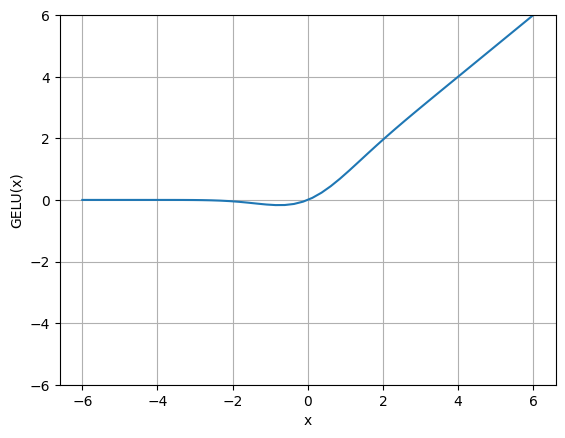

In [117]:
import matplotlib.pyplot as plt
x=np.linspace(-6,6)
y=0.5*x*(1+np.tanh(np.sqrt(2/np.pi)*(x+0.044715*x**3)))
plt.plot(x,y)
plt.grid()
plt.ylim(-6,6)
plt.xlabel('x')
plt.ylabel('GELU(x)')
plt.show()

In [118]:
MLP_Projection_Weights=np.random.uniform(-a,a,(n_embd,4*n_embd))
MLP_Projection_Bias=np.random.uniform(-a,a,(n_embd,1))

MLP_Result=MLP_Projection_Weights@MLP_Activation.T+MLP_Projection_Bias

print(MLP_Result.shape)

(48, 10)


In [119]:
MLP_Residual=Attention_Residual+MLP_Result

print(MLP_Residual.shape)

(48, 10)


In [120]:
#weights and biases for the blocks
beta1=np.zeros((n_layer,n_embd,1))
gamma1=np.zeros((n_layer,n_embd,1))
Projection_Weights=np.zeros((n_layer,n_embd,n_embd))
Projection_Bias=np.zeros((n_layer,n_embd,1))
beta2=np.zeros((n_layer,n_embd,1))
gamma2=np.zeros((n_layer,n_embd,1))
MLP_Weights=np.zeros((n_layer,n_embd,4*n_embd))
MLP_Bias=np.zeros((n_layer,1,4*n_embd))
MLP_Projection_Weights=np.zeros((n_layer,n_embd,4*n_embd))
MLP_Projection_Bias=np.zeros((n_layer,n_embd,1))

for n in range(n_layer):
  beta1[n]=np.random.uniform(-a,a,(n_embd,1))
  gamma1[n]=np.random.uniform(-a,a,(n_embd,1))
  Projection_Weights[n]=np.random.uniform(-a,a,(n_embd,n_embd))
  Projection_Bias[n]=np.random.uniform(-a,a,(n_embd,1))
  beta2[n]=np.random.uniform(-a,a,(n_embd,1))
  gamma2[n]=np.random.uniform(-a,a,(n_embd,1))
  MLP_Weights[n]=np.random.uniform(-a,a,(n_embd,4*n_embd))
  MLP_Bias[n]=np.random.uniform(-a,a,(1,4*n_embd))
  MLP_Projection_Weights[n]=np.random.uniform(-a,a,(n_embd,4*n_embd))
  MLP_Projection_Bias[n]=np.random.uniform(-a,a,(n_embd,1))

print(beta1.shape)

(3, 48, 1)


In [121]:
def Block(input,n):

  mu1=np.mean(input,axis=0,keepdims=True)
  sigma1=np.std(input,axis=0,keepdims=True)
  Layer_Norm1=(input-mu1)/np.sqrt(sigma1**2+eps)*gamma1[n]+beta1[n]

  Stack_V_Outputs=head(Layer_Norm1,n,0)
  for k in range(1,n_head):
    V_output=head(Layer_Norm1,n,k)
    Stack_V_Outputs=np.vstack((Stack_V_Outputs,V_output))

  Attention_Output=Projection_Weights[n]@Stack_V_outputs+Projection_Bias[n]

  Attention_Residual=Attention_Output+input

  mu2=np.mean(Attention_Residual,axis=0)
  sigma2=np.std(Attention_Residual,axis=0)
  Layer_Norm2=(Attention_Residual-mu2)/np.sqrt(sigma2**2+eps)*gamma2[n]+beta2[n]

  MLP=Layer_Norm2.T@MLP_Weights[n]+MLP_Bias[n]

  MLP_Activation=0.5*MLP*(1+np.tanh(np.sqrt(2/np.pi)*(MLP+0.044715*MLP**3))) #GELU, GaussianErrorLinearUnit

  MLP_Result=MLP_Projection_Weights[n]@MLP_Activation.T+MLP_Projection_Bias[n]

  MLP_Residual=Attention_Residual+MLP_Result

  return MLP_Residual


In [122]:
for n in range(1,n_layer):
  MLP_Residual=Block(MLP_Residual,n)

print(MLP_Residual.shape)

(48, 10)


In [123]:
beta3=np.random.uniform(-a,a,(n_embd,1))
gamma3=np.random.uniform(-a,a,(n_embd,1))
mu3=np.mean(MLP_Residual,axis=0)
sigma3=np.std(MLP_Residual,axis=0)
Layer_Norm3=(MLP_Residual-mu3)/np.sqrt(sigma3**2+eps)*gamma3+beta3

print(Layer_Norm3.shape)

(48, 10)


In [124]:
LM_Head_Weights=np.random.uniform(-a,a,(vocab_size,n_embd))
Logits=LM_Head_Weights@Layer_Norm3

print(Logits)
print()
print(Logits.shape)
print()
print(np.max(Logits,axis=0))
print()
print(np.argmax(Logits,axis=0))

[[-3.357 -2.983 -3.491 -4.222 -5.625 -5.9   -5.358 -3.796 -4.075 -3.577]
 [-2.267 -1.686 -2.631 -3.674 -3.601 -4.903 -3.901 -3.669 -3.567 -2.432]
 [-2.388 -2.417 -2.61  -2.44  -3.239 -2.547 -3.096 -2.537 -3.051 -2.544]]

(3, 10)

[-2.267 -1.686 -2.61  -2.44  -3.239 -2.547 -3.096 -2.537 -3.051 -2.432]

[1 1 2 2 2 2 2 2 2 1]


In [125]:
SM_Agg=np.zeros((2,block_size))
SM_Agg[0]=np.max(Logits,axis=0)
SM_Agg[1]=np.sum(np.exp(Logits-SM_Agg[0]),axis=0)
SM_Agg
Logits_softmax=np.exp(Logits-SM_Agg[0])/SM_Agg[1]

print(Logits_softmax)
print()
print(np.sum(Logits_softmax,axis=0))


[[0.151 0.156 0.173 0.115 0.051 0.031 0.067 0.177 0.184 0.144]
 [0.45  0.57  0.409 0.199 0.389 0.084 0.288 0.201 0.305 0.452]
 [0.399 0.274 0.418 0.685 0.559 0.885 0.645 0.623 0.511 0.404]]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
